In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

In [18]:
def initialisation(n0,n1,n2):
    W1 = np.random.randn(n1,n0)
    b1 = np.random.randn(n1,1)
    W2 = np.random.randn(n2,n1)
    b2 = np.random.randn(n2,1)
    
    parametres={
        'W1' : W1,
        'b1' : b1,
        'W2' : W2,
        'b2' : b2
    }
    
    return parametres

In [19]:
def forward_propagation(X, parametres):
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))

    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1': A1,
        'A2': A2
    }

    return activations

In [20]:
def back_propagation(X, y, parametres, activations):

    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }
    
    return gradients



In [21]:
def update(gradients, parametres, learning_rate):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres

In [22]:
def predict(X, parametres):
  activations = forward_propagation(X, parametres)
  A2 = activations['A2']
  return A2 >= 0.5

In [23]:
def neural_network(X, y, n1=32, learning_rate = 0.1, n_iter = 1000):

    # initialisation parametres
    n0 = X.shape[0]
    n2 = y.shape[0]
    np.random.seed(0)
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []
    history = []

    # gradient descent
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parametres)
        A2 = activations['A2']

        # Plot courbe d'apprentissage
        train_loss.append(log_loss(y.flatten(), A2.flatten()))
        y_pred = predict(X, parametres)
        train_acc.append(accuracy_score(y.flatten(), y_pred.flatten()))
        
        history.append([parametres.copy(), train_loss, train_acc, i])

        # mise a jour
        gradients = back_propagation(X, y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()

    return parametres

# Dataset

dimensions de X: (2, 100)
dimensions de y: (1, 100)


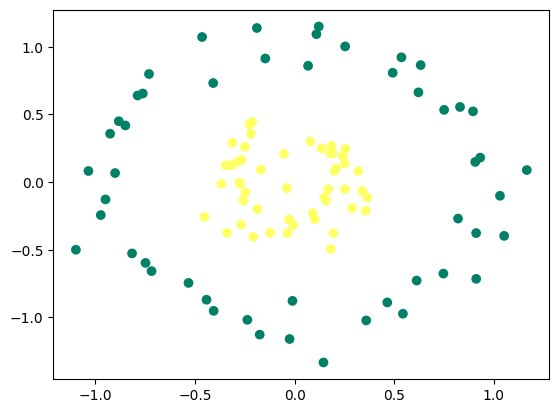

In [24]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()



100%|██████████| 1000/1000 [00:00<00:00, 1890.29it/s]


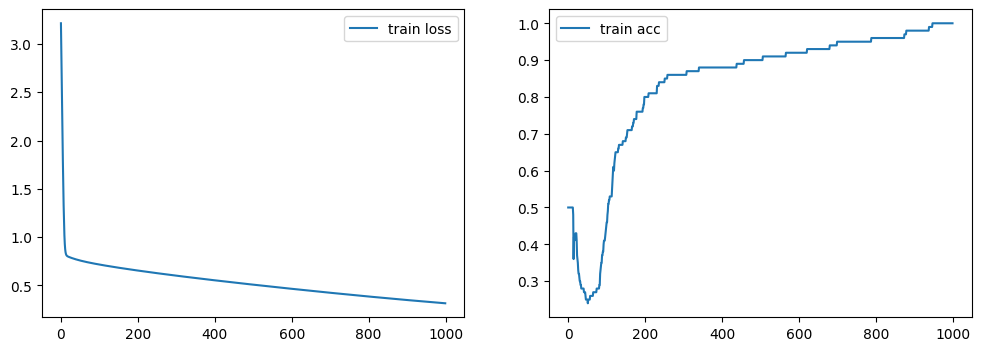

{'W1': array([[ 1.77432405,  0.43279495],
        [ 1.1270043 ,  2.33263418],
        [ 2.72469585, -1.36687471],
        [ 0.95547588, -0.15294234],
        [ 0.02266095,  0.03114714],
        [ 0.00511867,  2.26670042],
        [ 0.14297291,  0.1455327 ],
        [ 0.45500648,  0.2953939 ],
        [ 0.39364353,  0.05229975],
        [ 0.06948966, -0.26128899],
        [-2.60887662,  0.72497517],
        [ 1.7179407 , -1.26289978],
        [ 2.14891685, -1.47157603],
        [ 0.03962562, -0.14415223],
        [ 1.92434528,  1.47535576],
        [ 0.15385548,  0.32849369],
        [-1.49629642, -3.06026715],
        [-0.98713543,  0.32618646],
        [ 1.10834199,  1.17295969],
        [-0.21803429, -0.2155383 ],
        [-1.63542034, -2.16073358],
        [-1.88612734,  2.08720396],
        [-0.5753097 , -0.49394756],
        [-1.238711  ,  0.71719306],
        [-1.89550858, -0.1701086 ],
        [-0.24159264,  0.14472096],
        [-0.54156124, -1.19866227],
        [-0.11743641, 

In [28]:
neural_network(X, y, n1=32)